In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy import linalg as LA
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
import math


# !pip install tensorflow 
# import tensorflow as tf
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()


# B

In [4]:
swiss_roll = loadmat('C:/Users/8zeev/Desktop/geometry/swiss_roll_datasets/swiss_roll.mat')
swiss_roll_hole = loadmat('C:/Users/8zeev/Desktop/geometry/swiss_roll_datasets/swiss_roll_hole.mat') 
swiss_roll_noisy = loadmat('C:/Users/8zeev/Desktop/geometry/swiss_roll_datasets/swiss_roll_noisy.mat') 
     
s1= swiss_roll["x"]
s2= swiss_roll_hole["x"]
s3= swiss_roll_noisy["x"]

In [28]:
# create labels
r1 = np.sqrt(s1.T[:,0]**2+s1.T[:,2]**2)
r2 = np.sqrt(s2.T[:,0]**2+s2.T[:,2]**2)
r3 = np.sqrt(s3.T[:,0]**2+s3.T[:,2]**2)

isomap2 = Isomap( n_neighbors=5,  n_components=2)

s1_trans2 = isomap2.fit_transform(s1.T)
s2_trans2 = isomap2.fit_transform(s2.T)
s3_trans2 = isomap2.fit_transform(s3.T)

embedding = SpectralEmbedding(n_neighbors=6,n_components=7, gamma = 0.4)

s1_embed2 = embedding.fit_transform(s1.T)
s2_embed2 = embedding.fit_transform(s2.T)
s3_embed2 = embedding.fit_transform(s3.T)

In [34]:
s1_embed2.shape

(1000, 7)

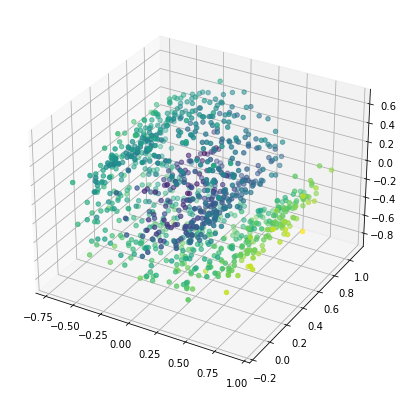

In [8]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(s3[0,:],s3[1,:],s3[2,:], c= r3)
# , c = _mean2['pts'],cmap='rainbow')


Text(0.5, 1.0, 'Swiss roll noisy Laplacian Eigenmap')

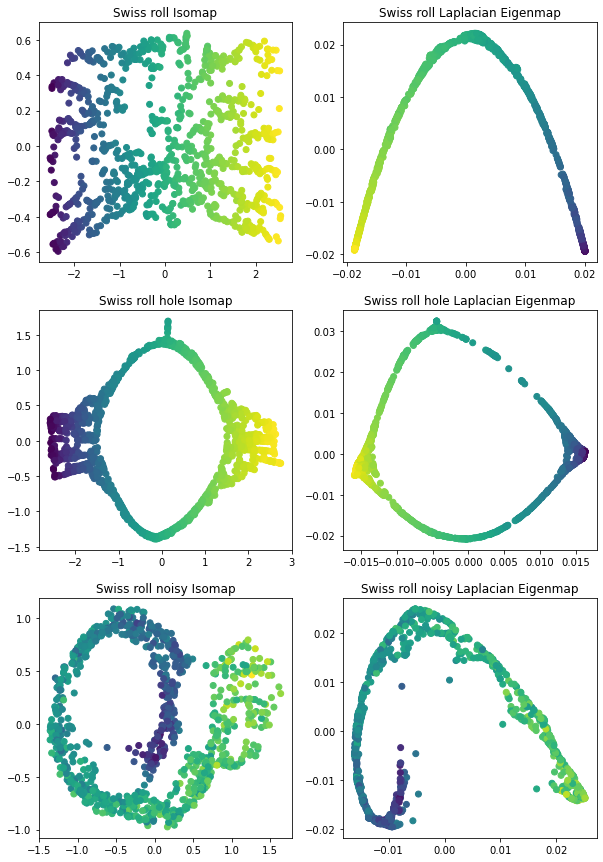

In [30]:
plt.figure(figsize=(10, 15))

plt.subplot(321)
plt.scatter(s1_trans2[:,0],s1_trans2[:,1], c= r1)
plt.title("Swiss roll Isomap")
plt.subplot(322)
plt.scatter(s1_embed2[:,0],s1_embed2[:,1], c= r1)
plt.title("Swiss roll Laplacian Eigenmap")

plt.subplot(323)
plt.scatter(s2_trans2[:,0],s2_trans2[:,1], c= r2)
plt.title("Swiss roll hole Isomap")
plt.subplot(324)
plt.scatter(s2_embed2[:,0],s2_embed2[:,1], c= r2)
plt.title("Swiss roll hole Laplacian Eigenmap")

plt.subplot(325)
plt.scatter(s3_trans2[:,0],s3_trans2[:,1], c= r3)
plt.title("Swiss roll noisy Isomap")
plt.subplot(326)
plt.scatter(s3_embed2[:,0],s3_embed2[:,1], c= r3)
plt.title("Swiss roll noisy Laplacian Eigenmap")

# C

In [36]:
from numpy.core.fromnumeric import shape
import random
index1 = random.sample(range(1,60000), 6000)
mnist6000 = x_train[index1]
mnist6000_2 = mnist6000.reshape(6000,28*28)
labels = y_train[index1] 
labels_2 = labels.reshape(6000,1)
labels_2.shape

isomap10 = Isomap( n_neighbors=50,  n_components=5)
mnist_iso = isomap10.fit_transform(mnist6000_2)

embedding2 = SpectralEmbedding(n_neighbors=50,n_components=7, gamma = 0.4)
mnist_embed2 = embedding2.fit_transform(mnist6000_2)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(mnist_iso[:,0],mnist_iso[:,1],mnist_iso[:,2], c = labels_2,cmap='rainbow')

fig = plt.figure(figsize = (10, 7))
bx = plt.axes(projection ="3d")
bx.scatter3D(mnist_embed2[:,0],mnist_embed2[:,1],mnist_embed2[:,2], c = labels_2,cmap='rainbow')
# bx.view_init(10, 110)

NameError: name 'x_train' is not defined

# 3

# a b c

In [38]:
import random
from sklearn.neighbors import kneighbors_graph

x = np.random.uniform(-1,1,1000)
y = np.random.uniform(-1,1,1000)

points=[]
for i in range(1000):
    points.append([x[i],y[i]])
points1 =  np.array( points )

sigma =1
graph30 = kneighbors_graph(points1, 30, mode='distance', include_self=False)
# graph30.toarray()[1]
w1 = graph30.toarray()
w1 = np.where(w1 != 0, np.exp(  -(w1**2 / 2*sigma**2)  ), w1)

# w = np.exp(  -(graph30.toarray()**2 / 2*sigma**2)  )

D = np.zeros((1000,1000))
for i in range(1000):
    D[i,i] = np.sum(w1[i])

D_s =  np.zeros((1000,1000))
for i in range(1000):
    D_s[i,i] = np.sum(w1[i])**(-0.5)
    
    

I = np.diag(np.full(1000,1))
L = I - D_s @ w1 @ D_s

    
U, EV, VT = np.linalg.svd(L)
u6 = U[:,-6:]

In [217]:
D

array([[29.64773787,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 29.68012935,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.73799962, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 29.57939896,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        29.6794871 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 29.67355506]])

Text(0.5, 1.0, '6th smallest eigenvector')

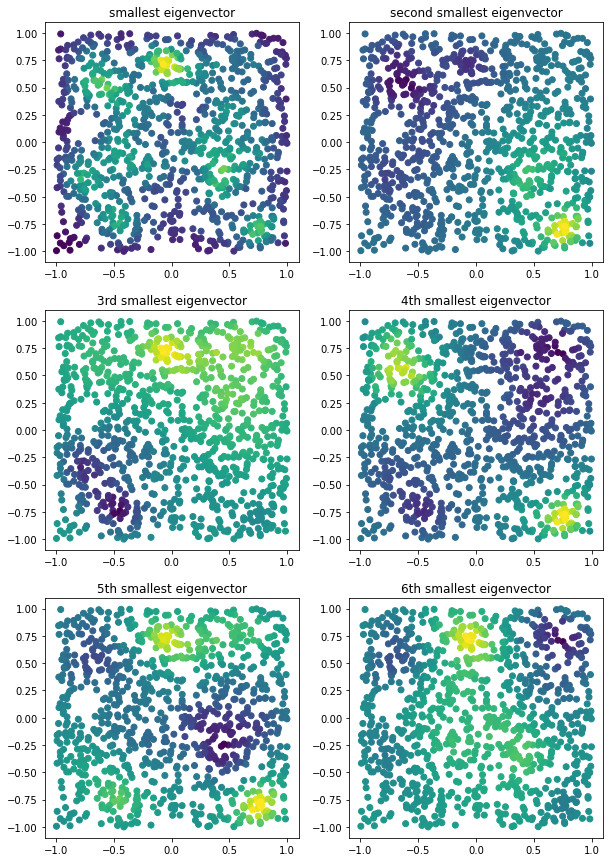

In [39]:
plt.figure(figsize=(10, 15))


plt.subplot(321)
plt.scatter(x,y, c=u6[:,5])
plt.title("smallest eigenvector")
plt.subplot(322)
plt.scatter(x,y, c=u6[:,4])
plt.title("second smallest eigenvector")

plt.subplot(323)
plt.scatter(x,y, c=u6[:,3])
plt.title("3rd smallest eigenvector")
plt.subplot(324)
plt.scatter(x,y, c=u6[:,2])
plt.title("4th smallest eigenvector")

plt.subplot(325)
plt.scatter(x,y, c=u6[:,1])
plt.title("5th smallest eigenvector")
plt.subplot(326)
plt.scatter(x,y, c=u6[:,0])
plt.title("6th smallest eigenvector")

# e

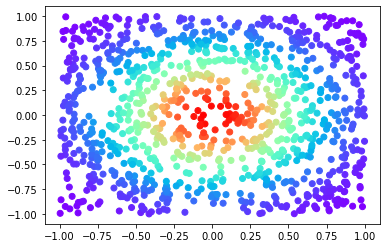

In [58]:
signal_e =[]
sigma_e = 0.4
for i in range(1000):
    signal_e.append( np.exp(  -(points[i][0]**2 + points[i][1]**2)/ sigma_e) )
 
plt.scatter(x,y, c=signal_e,cmap='rainbow')    
# signal_d = np.exp(  -(points[i][0]**2 + points[i][1]**2 / 2*sigma**2)


# f

17

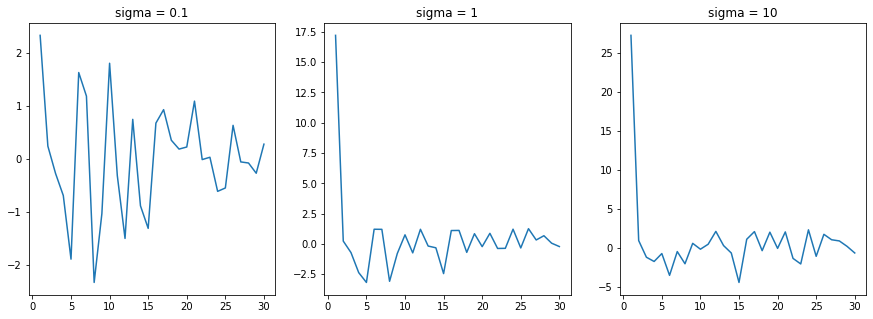

In [75]:
signal_f1 =[]
signal_f2 =[]
signal_f3 =[]

sigma_f1 = 0.1
sigma_f2 = 1
sigma_f3 = 10

for i in range(1000):
    signal_f1.append( np.exp(  -(points[i][0]**2 + points[i][1]**2)/ sigma_f1) )
    signal_f2.append( np.exp(  -(points[i][0]**2 + points[i][1]**2)/ sigma_f2) )
    signal_f3.append( np.exp(  -(points[i][0]**2 + points[i][1]**2)/ sigma_f3) )

u30 = U[:,-30:]

Fourier_domain1 =  []
Fourier_domain2 =  []
Fourier_domain3 =  []

for i in range(30):
    Fourier_domain1.append( np.dot(u30[:,29-i], signal_f1) )
    Fourier_domain2.append( np.dot(u30[:,29-i], signal_f2) )
    Fourier_domain3.append( np.dot(u30[:,29-i], signal_f3) )
    

# plt.plot(range(1,31),Fourier_domain1)

plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.plot(range(1,31),Fourier_domain1)
plt.title("sigma = 0.1")
plt.subplot(132)
plt.plot(range(1,31),Fourier_domain2)
plt.title("sigma = 1")
plt.subplot(133)
plt.plot(range(1,31),Fourier_domain3)
plt.title("sigma = 10")

# u30[:,0]
# u30.shape
np.dot([3,1], [4,5])

In [67]:
graph30.toarray()[1]

X = [[0,0], [3,3],[10,10],[11,11]]
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X, 1, mode='distance', include_self=False)
A.toarray()
# np.linalg.norm([1,1])
# an_array= np.array([[6,83,5],[120,4,5]])
# an_array = np.where(an_array > 20, 0, an_array)
# an_array
# type(graph30)

np.exp(A.toarray())

array([[ 1.        , 69.59137847,  1.        ,  1.        ],
       [69.59137847,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  4.11325038],
       [ 1.        ,  1.        ,  4.11325038,  1.        ]])

In [192]:
# u30 = U[:,:30]
# u30[:,0]
cross=[]

for j in range(30):
    count=0
    for i in range(999):
        if u30[i,j] * u30[i+1,j] < 0:
            count+=1
        
    cross.append(count)

# u30[:,30] 
plt.plot(range(1,31),cross)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])